## Wstęp

Tematem mojej pracy domowej jest znajdowanie cyklu Hamiltona w grafie, którego wierzchołki inicjujemy liczbami naturalnymi. Problemem cyklu Hamiltona jest odwiedzenie wszystkich wierzchołków grafu dokładnie raz z wyjątkiem tego, od którego zaczynamy i na nim kończymy.

## Algorytm genetyczny 1

Poniżej zaprezentuję implementację rozwiązywania problemu przy użyciu algorytmu genetycznego. Użytym narzędziem jest paczka pygad.

### Importowanie bibliotek

In [69]:
import pygad
import time
import pandas as pd

### Implementacja struktury grafu

Graf reprezentowany jest przez klasę Graph, której instancje inicjowane są listą wierzchołków będącymi z kolei instancjami klasy Vertex. Obsługiwane przez program grafy są nieskierowane i nie mają wag. Dla pary wierzchołków istnieje tylko jedna ścieżka.

In [4]:
class Vertex:
    def __init__(self, vertex):
        self.vertex = vertex
        self.neighbours = []
    def is_neighbour(self, candidate):
        for vertex in self.neighbours:
            if vertex.vertex == candidate.vertex:
                return True
        return False
    def add_neighbour(self, neighbour):
        status = self.is_neighbour(neighbour)
        if status:
            return False
        else:
            self.neighbours.append(neighbour)
            return True
    def delete_neighbour(self, neighbour):
        if self.is_neighbour(neighbour):
            self.neighbours.remove(neighbour)
            answer = str(self.vertex)+" and "+str(neighbour.vertex)+" are no longer neighbours"
            print(answer)
            return True
        else:
            return False
    def delete_all_neighbours(self):
        for elem in self.neighbours:
            elem.delete_neighbour(self)
    def print_vertex(self):
        print(self.vertex)
        my_list = []
        for i in self.neighbours:
            my_list.append(i.vertex)
        print(str(my_list))

class Graph:
    def __init__(self):
        self.vertexes = []
    def get_max(self):
        max_vertex = None
        for i in self.vertexes:
            if max_vertex == None or max_vertex < i.vertex:
                max_vertex = i.vertex
        return max_vertex
    def check_if_exists(self, candidate):
        for vertex in self.vertexes:
            if vertex.vertex == candidate.vertex:
                return True
        return False
    def add_vertex(self, vertex):
        status = self.check_if_exists(vertex)
        if not status:
            self.vertexes.append(vertex)
            answer = str(vertex.vertex)+" added to graph"
            print(answer)
            return True
        else:
            return False
    def delete_vertex(self, vertex):
        if self.check_if_exists(vertex):
            for neighbour in vertex.neighbours:
                neighbour.delete_neighbour(vertex)
            vertex.delete_all_neighbours()
            self.vertexes.remove(vertex)
            answer = str(vertex.vertex)+" deleted"
            print(answer)
            return True
        else:
            return False
    
    def add_edge(self, vertex1, vertex2):
        if self.check_if_exists(vertex1) and self.check_if_exists(vertex2):
            if vertex1.is_neighbour(vertex2):
                answer = str(vertex1.vertex)+" and "+str(vertex2.vertex)+" are already connected"
                print(answer)
                return False
            else:
                vertex1.add_neighbour(vertex2)
                vertex2.add_neighbour(vertex1)
                answer = str(vertex1.vertex)+" and "+str(vertex2.vertex)+" are now connected"
                print(answer)
                return True
        else:
            return False

        
    def chromosome_project(self):
        tab = []
        for i in self.vertexes:
            tab.append(i.vertex)
        return tab 
    
    def take_vertex(self, x: int):
        for i in self.vertexes:
            if i.vertex == x:
                return i
        raise ValueError("Vertex not found")

    def is_edge(self, a: Vertex, b: Vertex):
        return a.is_neighbour(b)

    def print_graph(self):
        print("GRAPH STRUCTURE:")
        print(len(self.vertexes))
        for vertex in self.vertexes:
            vertex.print_vertex()
            print("-------")
        print("END")

### Utworzenie instancji grafu i dodanie wierzchołków

Graf uzupełnimy wierzchołkami pętlą for. Domyślnie wierzchołki nie są połączone krawędziami. Oczywiście przed uzupełnieniem grafu musimy mieć przygotowaną jego teoretyczną postać. Wierzchołek dodajemy funkcją "add_vertex(liczba)", gdzie "liczba" zostanie przekonwertowana na obiekt klasy Vertex. Dodanie krawędzi między istniejącymi wierzchołkami odbywa się poprzez wywołanie funkcji "add_edge(wierzchołek1, wierzchołek2)", której argumenty są instancjami Vertex. Graf posiada również funkcję "take_vertex(liczba)", która pozwala na pobranie wierzchołka inicjowanego liczbą. Przy inicjalizacji wierzchołków pętlą for należy upewnić się czy używamy odpowiedniego zakresu liczb.

In [45]:
graph = Graph()
for i in range(1,25):
    graph.add_vertex(Vertex(i))
graph_max = graph.get_max()

graph.add_edge(graph.take_vertex(1), graph.take_vertex(2))
graph.add_edge(graph.take_vertex(1), graph.take_vertex(4))
graph.add_edge(graph.take_vertex(1), graph.take_vertex(8))

graph.add_edge(graph.take_vertex(2), graph.take_vertex(3))
graph.add_edge(graph.take_vertex(2), graph.take_vertex(17))

graph.add_edge(graph.take_vertex(3), graph.take_vertex(4))
graph.add_edge(graph.take_vertex(3), graph.take_vertex(22))

graph.add_edge(graph.take_vertex(4), graph.take_vertex(5))

graph.add_edge(graph.take_vertex(5), graph.take_vertex(6))
graph.add_edge(graph.take_vertex(5), graph.take_vertex(8))

graph.add_edge(graph.take_vertex(6), graph.take_vertex(7))
graph.add_edge(graph.take_vertex(6), graph.take_vertex(18))

graph.add_edge(graph.take_vertex(7), graph.take_vertex(8))
graph.add_edge(graph.take_vertex(7), graph.take_vertex(17))

graph.add_edge(graph.take_vertex(9), graph.take_vertex(10))
graph.add_edge(graph.take_vertex(9), graph.take_vertex(11))
graph.add_edge(graph.take_vertex(9), graph.take_vertex(12))

graph.add_edge(graph.take_vertex(10), graph.take_vertex(11))
graph.add_edge(graph.take_vertex(10), graph.take_vertex(23))

graph.add_edge(graph.take_vertex(11), graph.take_vertex(17))
graph.add_edge(graph.take_vertex(11), graph.take_vertex(12))

graph.add_edge(graph.take_vertex(12), graph.take_vertex(15))

graph.add_edge(graph.take_vertex(13), graph.take_vertex(14))
graph.add_edge(graph.take_vertex(13), graph.take_vertex(20))
graph.add_edge(graph.take_vertex(13), graph.take_vertex(16))

graph.add_edge(graph.take_vertex(14), graph.take_vertex(15))
graph.add_edge(graph.take_vertex(14), graph.take_vertex(21))

graph.add_edge(graph.take_vertex(15), graph.take_vertex(16))

graph.add_edge(graph.take_vertex(16), graph.take_vertex(18))

graph.add_edge(graph.take_vertex(17), graph.take_vertex(18))

graph.add_edge(graph.take_vertex(18), graph.take_vertex(19))
graph.add_edge(graph.take_vertex(18), graph.take_vertex(24))
graph.add_edge(graph.take_vertex(19), graph.take_vertex(20))
graph.add_edge(graph.take_vertex(19), graph.take_vertex(27))
graph.add_edge(graph.take_vertex(20), graph.take_vertex(21))
graph.add_edge(graph.take_vertex(21), graph.take_vertex(22))
graph.add_edge(graph.take_vertex(21), graph.take_vertex(28))
graph.add_edge(graph.take_vertex(22), graph.take_vertex(23))
graph.add_edge(graph.take_vertex(22), graph.take_vertex(26))
graph.add_edge(graph.take_vertex(23), graph.take_vertex(24))
graph.add_edge(graph.take_vertex(23), graph.take_vertex(25))
















1 added to graph
2 added to graph
3 added to graph
4 added to graph
5 added to graph
6 added to graph
7 added to graph
8 added to graph
9 added to graph
10 added to graph
11 added to graph
12 added to graph
13 added to graph
14 added to graph
15 added to graph
16 added to graph
17 added to graph
18 added to graph
19 added to graph
20 added to graph
21 added to graph
22 added to graph
23 added to graph
24 added to graph
25 added to graph
26 added to graph
27 added to graph
28 added to graph
1 and 2 are now connected
1 and 24 are now connected
1 and 12 are now connected
2 and 3 are now connected
2 and 8 are now connected
3 and 4 are now connected
3 and 28 are now connected
4 and 5 are now connected
4 and 17 are now connected
5 and 6 are now connected
5 and 26 are now connected
6 and 7 are now connected
6 and 27 are now connected
7 and 8 are now connected
7 and 25 are now connected
8 and 9 are now connected
9 and 10 are now connected
9 and 20 are now connected
11 and 26 are now connected


True

### Funkcja fitness

Funkcja fitness oraz sposób kodowania genów w chromosomie są kluczowe w przypadku rozwiązania tego problemu. Chromosomy są tablicami liczb naturalnych od 0 do 2000 o długości o jeden większa niż ilość wierzchołków w grafie. Na takich genach funkcja fitness wykona dzielenie modularne przez największą liczbę w grafie, aby najpierw wybrać pierwszy wierzchołek, a następnie jego sąsiadów. Następnie odbywa się przeliczenie częstości występowania elementów w grafie. Każdy chromosom domyślnie posiada wartość fitness ustawioną na 1000 pod warunkiem, że pierwszy i ostatni element (wierzchołek) będą takie same. Za każde powtórzenie innych wierzchołków odejmujemy 10 od fitness. Idealne rozwiązanie powinno mieć fitness równy 1000.  

In [42]:
def fitness_func(solution, solution_idx):
    first_vertex_id = (solution[0] % graph_max) + 1

    current_vertex_id = first_vertex_id
    path = [current_vertex_id]
    for i in solution[1:]:
        neighbor_index = (i % len(graph.take_vertex(current_vertex_id).neighbours))
        next_vertex_id = graph.take_vertex(current_vertex_id).neighbours[int(neighbor_index)].vertex
        current_vertex_id = next_vertex_id
        path.append(current_vertex_id)
        
    countByVertexId = {}
    for i in path:
        if i not in countByVertexId:
            countByVertexId[i] = 0
        countByVertexId[i] += 1

    for i in countByVertexId:
        countByVertexId[i] -= 1
    
    if current_vertex_id == first_vertex_id:
        countByVertexId[current_vertex_id] -= 1
        
    fitness = (1000 if current_vertex_id == first_vertex_id else 0) - 10 * sum([count ** 2 for count in countByVertexId.values()])
    return fitness

### Funkcje cleanup_solution i on_generation

Ponieważ chromosomy kodowane są jako tablice liczb naturalnych w zakresie od 0 do 2000 nie będą w dla nas czytelnym rozwiązanim omawianego problemu. Poniżej zdefiniowałem funkcję "cleanup_solution" działa w podobny sposób co funkcja fitness, ale jej celem jest zwracanie czytelnych rozwiązań. 
Algorytm genetyczny z paczki pygad może pobierać także funkcję on nazwie "on_generation", która wywoła się przy każdym pokoleniu. Dzięki niej możemy śledzić na bieżąco wyniki. 

In [35]:
def cleanup_solution(solution):
    current_vertex_id = (solution[0] % graph_max) + 1
    cleaned_solution = [current_vertex_id]
    for i in solution[1:]:
        neighbor_index = (i % len(graph.take_vertex(current_vertex_id).neighbours))
        next_vertex_id = graph.take_vertex(current_vertex_id).neighbours[int(neighbor_index)].vertex
        if graph.is_edge(graph.take_vertex(current_vertex_id), graph.take_vertex(next_vertex_id)):
            cleaned_solution.append(next_vertex_id)
            current_vertex_id = next_vertex_id
    return cleaned_solution

def on_generation(ga_instance):
	to_print = f"Generation = {ga_instance.generations_completed}" + f", Fitness = {ga_instance.best_solution()[1]}" + f", Solution = {cleanup_solution(ga_instance.best_solution()[0])}"
	print(to_print)

### Wywołanie algorytmu i pomiar czasu

In [46]:
for i in range(2):
    ga_instance = pygad.GA(
        gene_space={"low": 0, "high": 2000, "step": 1},
        num_generations=1000,
        fitness_func=fitness_func,
        sol_per_pop=2000,
        num_genes=len(graph.vertexes)+1,
        num_parents_mating=700,
        parent_selection_type="sss",
        crossover_type="single_point",
        keep_parents=30,
        mutation_type="random",
        mutation_probability=0.1,
        on_generation=on_generation,
        stop_criteria=["reach_1000"]
    )
    start = time.time()
    ga_instance.run()
    stop = time.time()
    runtime = stop-start
    data = [[runtime]]
    df = pd.DataFrame(data)
    df.to_csv("czas_input_duzy_alg1.csv", mode='a', index=False, header=False)
    solution, solution_fitness, solution_idx = ga_instance.best_solution() 

Generation = 1, Fitness = 940, Solution = [5.0, 26, 22, 23, 24, 1, 12, 13, 14, 15, 16, 15, 16, 17, 4, 3, 2, 3, 28, 21, 22, 21, 20, 9, 20, 19, 27, 6, 5]
Generation = 2, Fitness = 940, Solution = [5.0, 26, 22, 23, 24, 1, 12, 13, 14, 15, 16, 15, 16, 17, 4, 3, 2, 3, 28, 21, 22, 21, 20, 9, 20, 19, 27, 6, 5]
Generation = 3, Fitness = 940, Solution = [5.0, 26, 22, 23, 24, 1, 12, 13, 14, 15, 16, 15, 16, 17, 4, 3, 2, 3, 28, 21, 22, 21, 20, 9, 20, 19, 27, 6, 5]
Generation = 4, Fitness = 940, Solution = [5.0, 26, 22, 23, 24, 1, 12, 13, 14, 15, 16, 15, 16, 17, 4, 3, 2, 3, 28, 21, 22, 21, 20, 9, 20, 19, 27, 6, 5]
Generation = 5, Fitness = 940, Solution = [5.0, 26, 22, 23, 24, 1, 12, 13, 14, 15, 16, 15, 16, 17, 4, 3, 2, 3, 28, 21, 22, 21, 20, 9, 20, 19, 27, 6, 5]
Generation = 6, Fitness = 940, Solution = [5.0, 26, 22, 23, 24, 1, 12, 13, 14, 15, 16, 15, 16, 17, 4, 3, 2, 3, 28, 21, 22, 21, 20, 9, 20, 19, 27, 6, 5]
Generation = 7, Fitness = 940, Solution = [5.0, 26, 22, 23, 24, 1, 12, 13, 14, 15, 16, 1

# Algorytm genetyczny 2

Do rozwiązana problemu cyklu Hamiltona stworzyłem konkurencyjny algorytm genetyczny, w którym używam innego sposobu kodowania genów i innej funkcji fitness. Przestrzenią genów są wszytkie możliwe wierzchołki w grafie. Długość chromosomu jest taka sama jak ilość wierzchołków. Implementacja grafu bazuje na tej zdefiniowanej powyżej.

### Inicjalizacja drugiego grafu

In [71]:
graph = Graph()
for i in range(1,21):
    graph.add_vertex(Vertex(i))
graph_max2 = graph.get_max()

graph.add_edge(graph.take_vertex(1), graph.take_vertex(5))
graph.add_edge(graph.take_vertex(1), graph.take_vertex(6))
graph.add_edge(graph.take_vertex(1), graph.take_vertex(2))
graph.add_edge(graph.take_vertex(2), graph.take_vertex(8))
graph.add_edge(graph.take_vertex(2), graph.take_vertex(3))
graph.add_edge(graph.take_vertex(3), graph.take_vertex(4))
graph.add_edge(graph.take_vertex(3), graph.take_vertex(10))
graph.add_edge(graph.take_vertex(4), graph.take_vertex(5))
graph.add_edge(graph.take_vertex(4), graph.take_vertex(12))
graph.add_edge(graph.take_vertex(5), graph.take_vertex(14))
graph.add_edge(graph.take_vertex(6), graph.take_vertex(7))
graph.add_edge(graph.take_vertex(6), graph.take_vertex(15))
graph.add_edge(graph.take_vertex(7), graph.take_vertex(8))
graph.add_edge(graph.take_vertex(7), graph.take_vertex(17))
graph.add_edge(graph.take_vertex(8), graph.take_vertex(9))
graph.add_edge(graph.take_vertex(9), graph.take_vertex(10))
graph.add_edge(graph.take_vertex(9), graph.take_vertex(18))
graph.add_edge(graph.take_vertex(10), graph.take_vertex(11))
graph.add_edge(graph.take_vertex(11), graph.take_vertex(12))
graph.add_edge(graph.take_vertex(11), graph.take_vertex(19))
graph.add_edge(graph.take_vertex(12), graph.take_vertex(13))
graph.add_edge(graph.take_vertex(13), graph.take_vertex(14))
graph.add_edge(graph.take_vertex(13), graph.take_vertex(20))
graph.add_edge(graph.take_vertex(14), graph.take_vertex(15))
graph.add_edge(graph.take_vertex(15), graph.take_vertex(16))
graph.add_edge(graph.take_vertex(16), graph.take_vertex(17))
graph.add_edge(graph.take_vertex(16), graph.take_vertex(20))
graph.add_edge(graph.take_vertex(17), graph.take_vertex(18))
graph.add_edge(graph.take_vertex(18), graph.take_vertex(19))
graph.add_edge(graph.take_vertex(19), graph.take_vertex(20))

1 added to graph
2 added to graph
3 added to graph
4 added to graph
5 added to graph
6 added to graph
7 added to graph
8 added to graph
9 added to graph
10 added to graph
11 added to graph
12 added to graph
13 added to graph
14 added to graph
15 added to graph
16 added to graph
17 added to graph
18 added to graph
19 added to graph
20 added to graph
1 and 5 are now connected
1 and 6 are now connected
1 and 2 are now connected
2 and 8 are now connected
2 and 3 are now connected
3 and 4 are now connected
3 and 10 are now connected
4 and 5 are now connected
4 and 12 are now connected
5 and 14 are now connected
6 and 7 are now connected
6 and 15 are now connected
7 and 8 are now connected
7 and 17 are now connected
8 and 9 are now connected
9 and 10 are now connected
9 and 18 are now connected
10 and 11 are now connected
11 and 12 are now connected
11 and 19 are now connected
12 and 13 are now connected
13 and 14 are now connected
13 and 20 are now connected
14 and 15 are now connected
15 a

True

### Funkcja fitness

Funkcja fitness na początku zlicza wystąpienia genów w chromosomie, a następnie premiuje pojedyncze wystąpienia i kara za wielokrotne. W drugim etapie funkcja bada czy między sąsiadującymi elementami znajduje się krawędź premiując i karając chromosom w zależności od jej obecności. Na końcu sprawdzona zostaje ciągłość ścieżki, tzn. czy między pierwszym a ostatnim wierzchołkiem jest krawędź. 

In [52]:
def fitness_func2(solution, solution_idx):
    fitness = 0
    occurances = {}
    for i in solution:
        if i not in occurances:
            occurances[i] = 0
        occurances[i] += 1
    pairs = []
    count_ones = 0
    for j in range(len(solution)-1):
        if occurances[solution[j]] == 1:
            count_ones += 1
            fitness += (count_ones*1000)
        else:
            fitness = int(fitness/10)
        if graph.is_edge(graph.take_vertex(solution[j]), graph.take_vertex(solution[j+1])):
            pairs.append((solution[j], solution[j+1]))
            fitness += ((len(pairs)+1)*10)
        else:
            if len(pairs) == 0:
                fitness -= 100
            else:
                fitness -= ((len(pairs)+1)*10)
            pairs = []
    if occurances[solution[-1]] == 1:
        count_ones += 1
        fitness += (count_ones*10)
    else:
        fitness = int(fitness/10)
    if graph.is_edge(graph.take_vertex(solution[0]), graph.take_vertex(solution[-1])):
        pairs.append((solution[0], solution[-1]))
        fitness += ((len(pairs)+1)*10)
    else:
        fitness -= ((len(pairs)+1)*10)
    

    return fitness

### Inicjalizacja algorytmu

Generation = 1, Fitness = 74239, Solution = [3.0, 10, 11, 10, 11, 19, 20, 19, 20, 13, 14, 15, 6, 1, 6, 7, 17, 16, 15, 6]
Generation = 2, Fitness = 74239, Solution = [3.0, 10, 11, 10, 11, 19, 20, 19, 20, 13, 14, 15, 6, 1, 6, 7, 17, 16, 15, 6]
Generation = 3, Fitness = 74239, Solution = [3.0, 10, 11, 10, 11, 19, 20, 19, 20, 13, 14, 15, 6, 1, 6, 7, 17, 16, 15, 6]
Generation = 4, Fitness = 74239, Solution = [3.0, 10, 11, 10, 11, 19, 20, 19, 20, 13, 14, 15, 6, 1, 6, 7, 17, 16, 15, 6]
Generation = 5, Fitness = 74439, Solution = [3.0, 10, 11, 10, 11, 19, 20, 19, 20, 16, 17, 18, 9, 8, 7, 8, 9, 10, 3, 2]
Generation = 6, Fitness = 74439, Solution = [3.0, 10, 11, 10, 11, 19, 20, 19, 20, 16, 17, 18, 9, 8, 7, 8, 9, 10, 3, 2]
Generation = 7, Fitness = 74439, Solution = [3.0, 10, 11, 10, 11, 19, 20, 19, 20, 16, 17, 18, 9, 8, 7, 8, 9, 10, 3, 2]
Generation = 8, Fitness = 74439, Solution = [3.0, 10, 11, 10, 11, 19, 20, 19, 20, 16, 17, 18, 9, 8, 7, 8, 9, 10, 3, 2]
Generation = 9, Fitness = 74439, Solutio

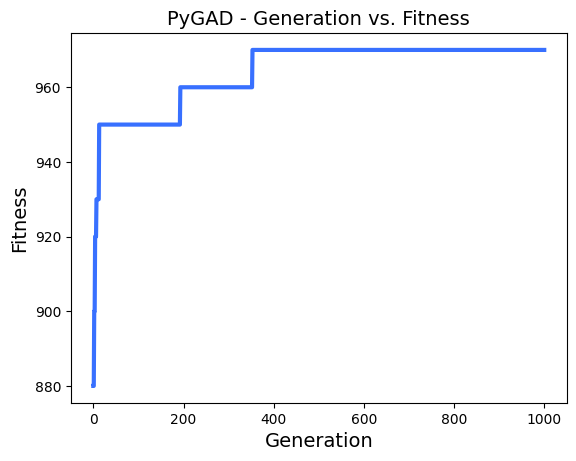

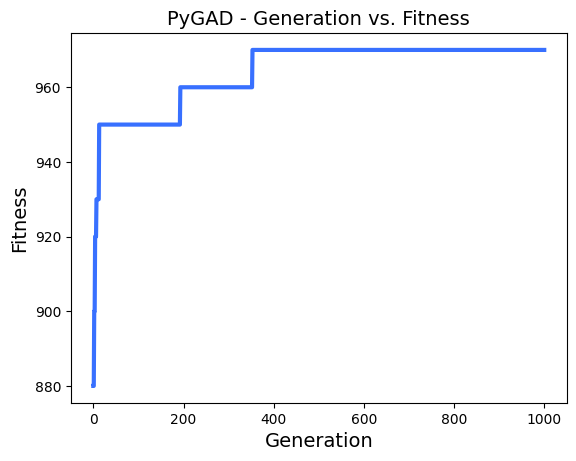

In [73]:
ga_instance2 = pygad.GA(
    gene_space={"low": 1, "high": len(graph.vertexes), "step": 1},
    num_generations=1000,
    fitness_func=fitness_func2,
    sol_per_pop=2000,
    num_genes=len(graph.vertexes),
    num_parents_mating=700,
    parent_selection_type="sss",
    crossover_type="single_point",
    keep_parents=30,
    mutation_type="random",
    mutation_probability=0.1,
    on_generation=on_generation,
)

start = time.time()
ga_instance2.run()
stop = time.time()
runtime = stop-start
data = [[runtime]]
df = pd.DataFrame(data)
df.to_csv("czas_input_sredni_alg2.csv", mode='a', index=False, header=False)
solution, solution_fitness, solution_idx = ga_instance2.best_solution()

print(solution)
ga_instance.plot_fitness()

# Ocena obu algorytmów

Z obserwacji powyższych algorytmów doszedłem do wniosku, że zdecydowanie lepsze wyniki zwraca algorytm pierwszy. Drugi algorytm jest bardziej wadliwy, ponieważ w jego chromosomach praktycznie zawsze powtarzają się wierzchołki co jest o wiele rzadziej spotykane w wariancie pierwszym. Ponadto algorytm numer 1 nie zawsze potrzebuje przechodzić przez wszystkie narzucone mu generacje, ponieważ jest w stanie znaleźć cykl Hamiltona jeszcze przed osiągnięciem maksymalnej liczby pokoleń.

## Pomiar czasu

### Algorytm nr 1 dla inputów małych

In [63]:
df1 = pd.read_csv('czas_input_maly_alg1.csv')
df1.head()


,input_maly
0,0.329599
1,0.306975
2,0.285001
3,0.321618
4,0.260037


### Algorytm nr 1 dla inputów średnich-dużych

In [74]:
df = pd.read_csv('czas_input_sredni_alg1.csv')
df.head()

,input_sredni_duzy
0,293.092323
1,298.300362
2,299.005080
3,298.570050
4,313.661535


### Algorytm 2 dla inputów małych

In [75]:
df = pd.read_csv('czas_input_maly_alg2.csv')
df.head()

,input_maly
0,213.956652
1,206.686024
2,243.621548


### Algorytm 2 dla inputów średnich-dużych

In [79]:
df = pd.read_csv('czas_input_sredni_alg2.csv')
df.head()

,input_sredni_duzy
0,464.904170
1,456.556812


## Bibliografia

Przykładowe grafy z cyklem Hamiltona: https://www.gatevidyalay.com/hamiltonian-graphs-hamiltonian-path-hamiltonian-circuit/
